Importacoes para o uso do scikitlearn

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

Carregamento dos dados

In [2]:
#Leitura da tabela pré-processada
#df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/adasyn.csv')
#df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/smote.csv')
df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/amostra_por_classificador.csv')

#df.drop(columns=['Unnamed: 0'], inplace=True)

print(df.columns)

print(df['WQI'].value_counts())

# A variável X determina o conjunto de atributos sem o rótulo
X = df.drop('WQI', axis=1)

# O Y são os rótulos contendo a classificação do WQI
y = df['WQI']

Index(['Dissolved oxygen', 'pH', 'Conductivity', 'Nitrate', 'Fecal coliform',
       'Total coliform', 'Biological oxygen demand', 'WQI'],
      dtype='object')
1    177
2    177
3    177
4    177
Name: WQI, dtype: int64


<h2>Dividir os dados para treinamento

In [3]:
# Divisão de dados testes e de treinamento relacionado ao X e Y, de forma a garantir relação entre os mesmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<h2>Treinamento

In [4]:
# Instância de Árvore de Decisão
decisionTree = DecisionTreeClassifier(criterion="gini", random_state=42)

# Treinamento modelo
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

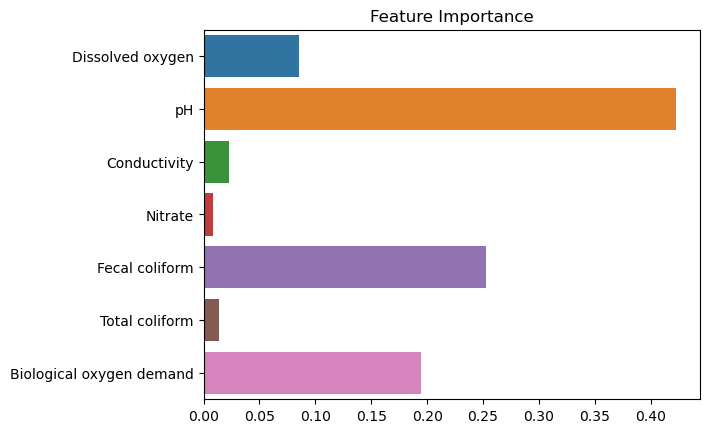

In [5]:
# Predição do WQI com base no treinamento
y_pred = decisionTree.predict(X_test)

# Exibição das métricas de importância dos atributos analisados
feature_importances = decisionTree.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

AP SCORE
0.8130291083883764
              precision    recall  f1-score   support

           1     0.8936    0.9333    0.9130        45
           2     0.8611    0.8378    0.8493        37
           3     0.8654    0.9000    0.8824        50
           4     0.9286    0.8667    0.8966        45

    accuracy                         0.8870       177
   macro avg     0.8872    0.8845    0.8853       177
weighted avg     0.8877    0.8870    0.8869       177

Profundidade da árvore: 11

ROC


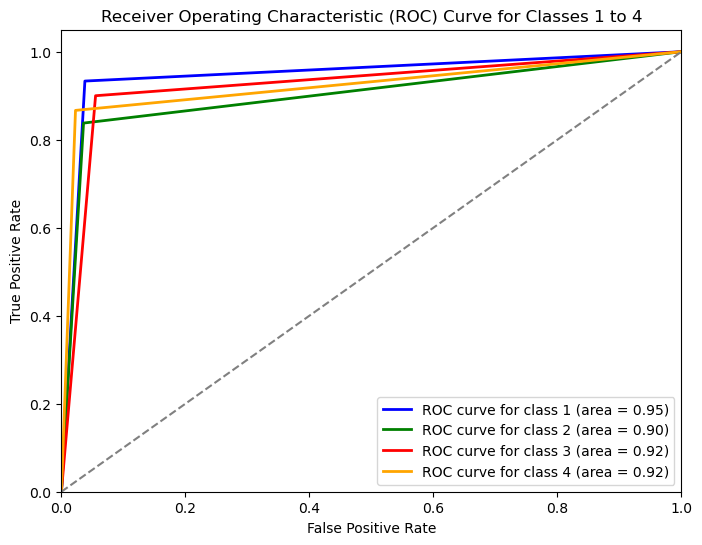


Confusion Matrix


<Axes: >

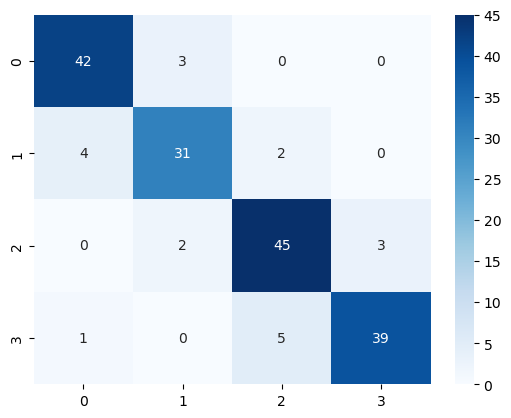

In [6]:
# # Acurácia
# Acurácia irá medir a relação de verdadeiros(positivos e negativos) e total da amostragem
# (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)
accuracy = accuracy_score(y_test, y_pred)
    
# # Precisão
# A precisão irá medir a relação entre verdadeiros positivos e total positivo
# TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='macro')
# average='macro' foi utilizado pois as classes estão balanceadas, resultando em um calculo de precisão indivual e depois média entre os resultados

# # Average Precision Score *** NAO SEI PQ TEM SOMENTE 1 ou 0 no y_scores
# A função predict_proba() vai produzir uma matriz de probabilidade referente aos dados para usar no teste
y_scores = decisionTree.predict_proba(X_test)

#print(y_scores)

# A função average_precision_score() calcula o AP com base nas respostas e nas matrizes de probabilidades
apScore = average_precision_score(y_test, y_scores)
print("AP SCORE")
print(apScore)

# # Recall
# O Recall irá medir a capacidade do modelo em escolher instâncias positivas de forma correta (sensibilidade)
# TruePositives / (TruePositives + FalsePositives)
recall = recall_score(y_test, y_pred, average='macro')
# average='macro' foi utilizado pois as classes estão balanceadas, resultando em um calculo de precisão indivual e depois média entre os resultados

# # F1-Score
# O F1-Score relação entre recall e precisão que realça valores menores, dando mais importância a este fato para a análise
# 2 * (Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred, average='macro')
# average='macro' foi utilizado pois as classes estão balanceadas, resultando em um calculo de precisão indivual e depois média entre os resultados

print(classification_report(y_test, y_pred, digits=4))

# # Profundidade máxima da arvore
print(f'Profundidade da árvore: {decisionTree.get_depth()}')

# # ROC
print('\nROC')
# Binarizando os rótulos para a abordagem one-vs-rest
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Calculando ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Classes 1 to 4')
plt.legend(loc="lower right")
plt.show()

# # Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues")